## Create Image Paths and Labels DF

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/MyDrive/Chest X-Ray ML/Data_Entry_2017.csv'

path_and_labels = pd.read_csv(file_path)


In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
unique_labels = path_and_labels['Finding Labels'].unique()
unique_labels

In [ ]:
for index, row in path_and_labels.iterrows():
    labels = row['Finding Labels']
    # Check if 'Emphysema' is in the labels
    if 'Effusion' in labels:
        # If 'Emphysema' is present, set the labels to 'Emphysema'
        path_and_labels.at[index, 'Finding Labels'] = 'Effusion'
    else:
        # If 'Emphysema' is not present, set the labels to 'Not Emphysema'
        path_and_labels.at[index, 'Finding Labels'] = 'Not Effusion'

# Display the modified DataFrame
path_and_labels['Finding Labels']

0         Not Effusion
1         Not Effusion
2             Effusion
3         Not Effusion
4         Not Effusion
              ...     
112115    Not Effusion
112116    Not Effusion
112117    Not Effusion
112118    Not Effusion
112119    Not Effusion
Name: Finding Labels, Length: 112120, dtype: object

In [ ]:
label_counts = path_and_labels['Finding Labels'].value_counts()
label_counts

Finding Labels
Not Effusion    98803
Effusion        13317
Name: count, dtype: int64

In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
# /content/drive/MyDrive/archive/images_001/images/

In [ ]:
prefixes = {
    0: '/content/drive/MyDrive/archive/images_001/images/',
    4999: '/content/drive/MyDrive/archive/images_002/images/',
    14999: '/content/drive/MyDrive/archive/images_003/images/',
    24999: '/content/drive/MyDrive/archive/images_004/images/',
    34999: '/content/drive/MyDrive/archive/images_005/images/',
    44999: '/content/drive/MyDrive/archive/images_006/images/',
    54999: '/content/drive/MyDrive/archive/images_007/images/',
    64999: '/content/drive/MyDrive/archive/images_008/images/',
    74999: '/content/drive/MyDrive/archive/images_009/images/',
    84999: '/content/drive/MyDrive/archive/images_010/images/',
    94999: '/content/drive/MyDrive/archive/images_011/images/',
    104999: '/content/drive/MyDrive/archive/images_012/images/'
}

# Update the 'Image Index' column based on the row index
for index, row in path_and_labels.iterrows():
    for start_index, prefix in prefixes.items():
        next_index = list(prefixes.keys())[list(prefixes.keys()).index(start_index) + 1] if list(prefixes.keys()).index(start_index) + 1 < len(prefixes) else len(path_and_labels)
        if index < next_index:
            path_and_labels.at[index, 'Image Index'] = prefix + row['Image Index']
            break


# Display the first few rows of the updated DataFrame to verify the changes
print(path_and_labels['Image Index'].head())

0    /content/drive/MyDrive/archive/images_001/imag...
1    /content/drive/MyDrive/archive/images_001/imag...
2    /content/drive/MyDrive/archive/images_001/imag...
3    /content/drive/MyDrive/archive/images_001/imag...
4    /content/drive/MyDrive/archive/images_001/imag...
Name: Image Index, dtype: object


In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
# /content/drive/MyDrive/archive

In [ ]:
output_file_path = '/content/drive/MyDrive/archive/reupdated_path_and_labels.csv'

# Save the updated DataFrame to a CSV file
path_and_labels.to_csv(output_file_path, index=False)

In [ ]:
from PIL import Image

# Specify the path to the image
image_path = '/content/drive/MyDrive/archive/images_010/images/00024715_000.png'

# Load the image using PIL
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Print the dimensions
print("Image dimensions (width x height):", width, "x", height)

# Get the mode of the image
mode = image.mode

# Print the mode
print("Image mode:", mode)

# L means grayscale

Image dimensions (width x height): 1024 x 1024
Image mode: L


In [ ]:
image.show()

## Create dataset subset

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/MyDrive/archive/reupdated_path_and_labels.csv'

path_and_labels = pd.read_csv(file_path)

In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
not_effusion_df = path_and_labels[path_and_labels['Finding Labels'] == 'Not Effusion'].head(1500)

# Filter rows where 'Finding Labels' is 'Effusion'
effusion_df = path_and_labels[path_and_labels['Finding Labels'] == 'Effusion'].head(1500)

# Concatenate the two DataFrames
path_label_3000 = pd.concat([not_effusion_df, effusion_df])

# Reset index
path_label_3000.reset_index(drop=True, inplace=True)

# Print the first few rows of the new DataFrame
print(path_label_3000)

                                            Image Index Finding Labels  \
0     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
1     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
2     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
3     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
4     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
...                                                 ...            ...   
2995  /content/drive/MyDrive/archive/images_003/imag...       Effusion   
2996  /content/drive/MyDrive/archive/images_003/imag...       Effusion   
2997  /content/drive/MyDrive/archive/images_003/imag...       Effusion   
2998  /content/drive/MyDrive/archive/images_003/imag...       Effusion   
2999  /content/drive/MyDrive/archive/images_003/imag...       Effusion   

      Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
0               0           1       

In [ ]:
path_label_3000

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,/content/drive/MyDrive/archive/images_003/imag...,Effusion,2,4316,45,M,AP,2500,2048,0.171,0.171,NaN
2996,/content/drive/MyDrive/archive/images_003/imag...,Effusion,3,4316,45,M,AP,2500,2048,0.171,0.171,NaN
2997,/content/drive/MyDrive/archive/images_003/imag...,Effusion,4,4316,45,M,AP,2500,2048,0.171,0.171,NaN
2998,/content/drive/MyDrive/archive/images_003/imag...,Effusion,5,4316,45,M,AP,2500,2048,0.171,0.171,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder


labels = path_label_3000['Finding Labels'].values

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Print the mapping between original labels and encoded values
label_mapping = {label: encoded_label for label, encoded_label in zip(labels, encoded_labels)}
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
Not Effusion: 1
Effusion: 0


In [ ]:
len(encoded_labels)

3000

In [ ]:
import cv2
import numpy as np
from multiprocessing import Pool

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32') / 255.0
    return img

def process_batch(batch_paths):
    batch_images = [load_image(image_path) for image_path in batch_paths]
    return batch_images

def load_images_from_df(df, num_processes=4, batch_size=32):
    image_paths = df['Image Index'].values
    images = []

    with Pool(processes=num_processes) as pool:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i+batch_size]
            batch_results = pool.map(process_batch, [batch_paths])
            for result in batch_results:
                images.extend(result)

    return np.array(images)

# Load images from the DataFrame 'path_and_labels'
images = load_images_from_df(path_label_3000)

# Print the shape of training_images
print(images.shape)

(3000, 256, 256, 3)


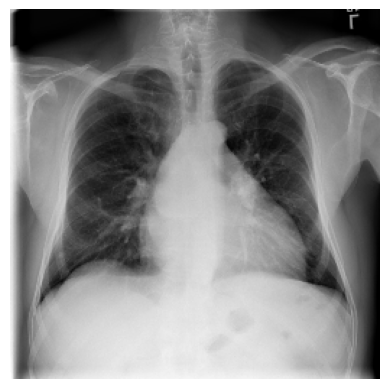

In [ ]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0])
plt.axis('off')  # Hide axis
plt.show()

## Define a Model to Train

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
initial_learning_rate = 0.00025  # Change this value as needed


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
100/100 [==============================] - 181s 2s/step - loss: 0.8928 - accuracy: 0.5594 - val_loss: 0.6386 - val_accuracy: 0.6575
Epoch 2/10
100/100 [==============================] - 183s 2s/step - loss: 0.6409 - accuracy: 0.6281 - val_loss: 0.6159 - val_accuracy: 0.6550
Epoch 3/10
100/100 [==============================] - 191s 2s/step - loss: 0.5873 - accuracy: 0.6775 - val_loss: 0.6437 - val_accuracy: 0.6150
Epoch 4/10
100/100 [==============================] - 184s 2s/step - loss: 0.5067 - accuracy: 0.7375 - val_loss: 0.6913 - val_accuracy: 0.6325
Epoch 5/10
100/100 [==============================] - 183s 2s/step - loss: 0.4163 - accuracy: 0.8025 - val_loss: 0.7829 - val_accuracy: 0.5950
Epoch 6/10
100/100 [==============================] - 192s 2s/step - loss: 0.3058 - accuracy: 0.8637 - val_loss: 0.8991 - val_accuracy: 0.6175
Epoch 7/10
100/100 [==============================] - 187s 2s/step - loss: 0.2366 - accuracy: 0.9038 - val_loss: 0.9537 - val_accuracy: 0.6075

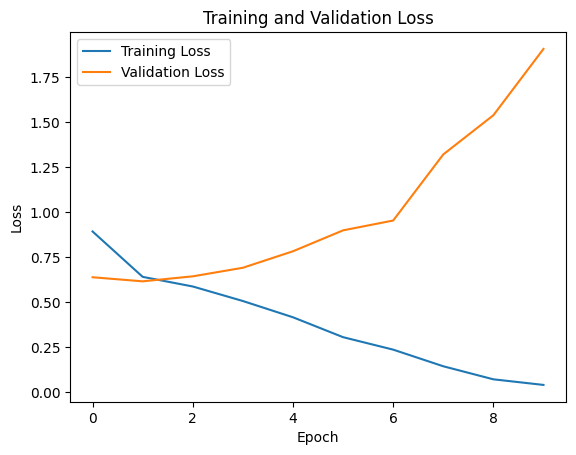

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 15s 1s/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.62      0.46      0.53       201
Not Effusion       0.57      0.71      0.63       199

    accuracy                           0.58       400
   macro avg       0.59      0.59      0.58       400
weighted avg       0.59      0.58      0.58       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with the ReduceLROnPlateau callback
history2 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
100/100 [==============================] - 177s 2s/step - loss: 0.9427 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 187s 2s/step - loss: 0.6898 - accuracy: 0.5719 - val_loss: 0.6510 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 176s 2s/step - loss: 0.6367 - accuracy: 0.6369 - val_loss: 0.6604 - val_accuracy: 0.5825 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 185s 2s/step - loss: 0.5200 - accuracy: 0.7287 - val_loss: 0.7118 - val_accuracy: 0.6025 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 185s 2s/step - loss: 0.3809 - accuracy: 0.8294 - val_loss: 0.8541 - val_accuracy: 0.5975 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 176s 2s/step - loss: 0.2370 - accuracy: 0.9044 - val_loss: 0.9359 - val_accuracy: 0.6175 - lr: 2.0000e-04
Epoch 7/10
100/100 [==============================] - 187s 2

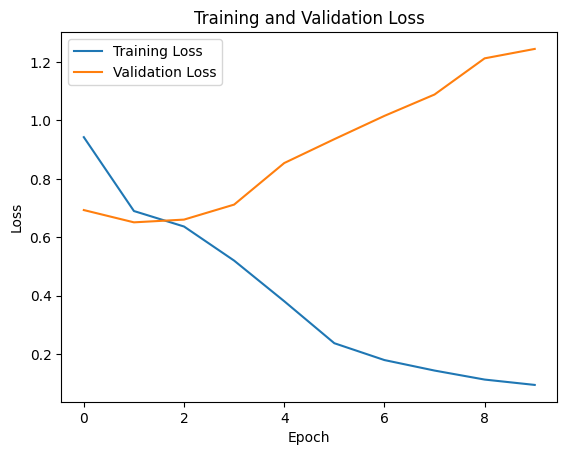

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 15s 1s/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.61      0.63      0.62       201
Not Effusion       0.61      0.59      0.60       199

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

from tensorflow.keras.optimizers import Adam

# Define your desired starting learning rate
initial_learning_rate = 0.00025  # Change this value as needed

# Create an Adam optimizer with the desired initial learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)

# Train the model with the ReduceLROnPlateau callback
history3 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
100/100 [==============================] - 188s 2s/step - loss: 0.7330 - accuracy: 0.5181 - val_loss: 0.6915 - val_accuracy: 0.5575 - lr: 2.5000e-04
Epoch 2/10
100/100 [==============================] - 184s 2s/step - loss: 0.6893 - accuracy: 0.5225 - val_loss: 0.6848 - val_accuracy: 0.6325 - lr: 2.5000e-04
Epoch 3/10
100/100 [==============================] - 186s 2s/step - loss: 0.6738 - accuracy: 0.5775 - val_loss: 0.6617 - val_accuracy: 0.6225 - lr: 2.5000e-04
Epoch 4/10
100/100 [==============================] - 187s 2s/step - loss: 0.6634 - accuracy: 0.6244 - val_loss: 0.6707 - val_accuracy: 0.6225 - lr: 2.5000e-04
Epoch 5/10
100/100 [==============================] - 185s 2s/step - loss: 0.6509 - accuracy: 0.6581 - val_loss: 0.6524 - val_accuracy: 0.6475 - lr: 5.0000e-05
Epoch 6/10
100/100 [==============================] - 194s 2s/step - loss: 0.6424 - accuracy: 0.6619 - val_loss: 0.6510 - val_accuracy: 0.6550 - lr: 5.0000e-05
Epoch 7/10
100/100 [====================

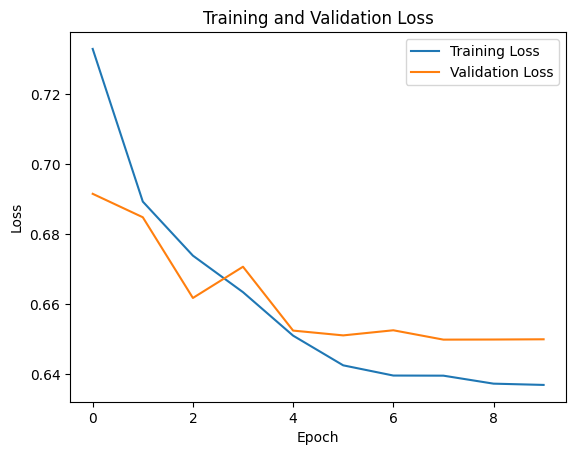

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 12s 882ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.66      0.64      0.65       201
Not Effusion       0.65      0.67      0.66       199

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.65       400
weighted avg       0.66      0.66      0.65       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

from tensorflow.keras.optimizers import Adam

# Define your desired starting learning rate
initial_learning_rate = 0.00025  # Change this value as needed

# Create an Adam optimizer with the desired initial learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)

# Train the model with the ReduceLROnPlateau callback
history4 = model.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
64/64 [==============================] - 207s 3s/step - loss: 0.8292 - accuracy: 0.5506 - val_loss: 0.6747 - val_accuracy: 0.5650 - lr: 2.5000e-04
Epoch 2/10
64/64 [==============================] - 181s 3s/step - loss: 0.6405 - accuracy: 0.6319 - val_loss: 0.6231 - val_accuracy: 0.6500 - lr: 2.5000e-04
Epoch 3/10
64/64 [==============================] - 180s 3s/step - loss: 0.5824 - accuracy: 0.6969 - val_loss: 0.6080 - val_accuracy: 0.6900 - lr: 2.5000e-04
Epoch 4/10
64/64 [==============================] - 170s 3s/step - loss: 0.5291 - accuracy: 0.7206 - val_loss: 0.6111 - val_accuracy: 0.6700 - lr: 2.5000e-04
Epoch 5/10
64/64 [==============================] - 183s 3s/step - loss: 0.4566 - accuracy: 0.7850 - val_loss: 0.6161 - val_accuracy: 0.6700 - lr: 5.0000e-05
Epoch 6/10
64/64 [==============================] - 174s 3s/step - loss: 0.4364 - accuracy: 0.8019 - val_loss: 0.6186 - val_accuracy: 0.6675 - lr: 1.0000e-05
Epoch 7/10
64/64 [==============================] - 

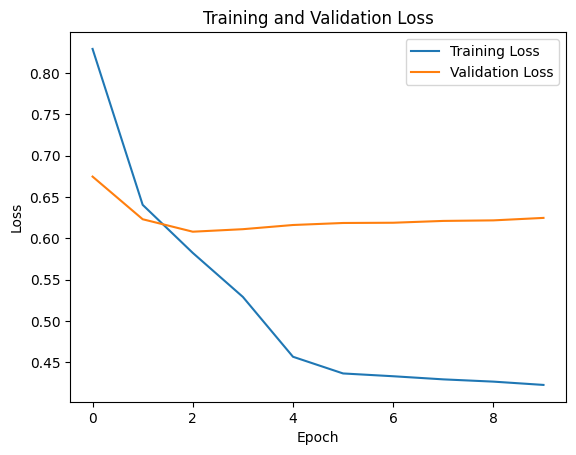

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history4.history['loss']
validation_loss = history4.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 11s 842ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.68      0.62      0.65       201
Not Effusion       0.65      0.71      0.68       199

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

# Define the CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for reducing learning rate, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history5 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
50/50 [==============================] - 178s 4s/step - loss: 0.8714 - accuracy: 0.5056 - val_loss: 0.6887 - val_accuracy: 0.5400 - lr: 2.5000e-04
Epoch 2/10
50/50 [==============================] - 189s 4s/step - loss: 0.6897 - accuracy: 0.5325 - val_loss: 0.6859 - val_accuracy: 0.5900 - lr: 2.5000e-04
Epoch 3/10
50/50 [==============================] - 177s 4s/step - loss: 0.6793 - accuracy: 0.5663 - val_loss: 0.6583 - val_accuracy: 0.6600 - lr: 2.5000e-04
Epoch 4/10
50/50 [==============================] - 173s 3s/step - loss: 0.6659 - accuracy: 0.5838 - val_loss: 0.6556 - val_accuracy: 0.6400 - lr: 2.5000e-04
Epoch 5/10
50/50 [==============================] - 178s 4s/step - loss: 0.6621 - accuracy: 0.5994 - val_loss: 0.6409 - val_accuracy: 0.6250 - lr: 2.5000e-04
Epoch 6/10
50/50 [==============================] - 177s 4s/step - loss: 0.6362 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6300 - lr: 2.5000e-04
Epoch 7/10
50/50 [==============================] - 

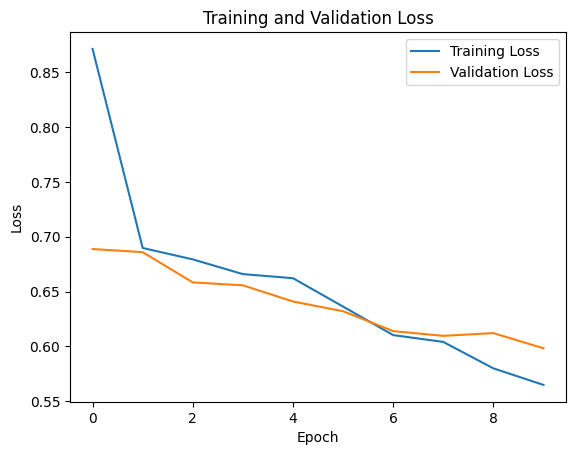

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history5.history['loss']
validation_loss = history5.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 12s 899ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.68      0.70      0.69       201
Not Effusion       0.69      0.67      0.68       199

    accuracy                           0.69       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.69      0.69      0.68       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

# Define the CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for reducing learning rate, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history6 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
75/75 [==============================] - 240s 3s/step - loss: 0.7513 - accuracy: 0.5200 - val_loss: 0.6842 - val_accuracy: 0.5900 - lr: 2.5000e-04
Epoch 2/10
75/75 [==============================] - 243s 3s/step - loss: 0.6740 - accuracy: 0.5800 - val_loss: 0.6645 - val_accuracy: 0.6383 - lr: 2.5000e-04
Epoch 3/10
75/75 [==============================] - 248s 3s/step - loss: 0.6572 - accuracy: 0.6154 - val_loss: 0.6557 - val_accuracy: 0.6183 - lr: 2.5000e-04
Epoch 4/10
75/75 [==============================] - 246s 3s/step - loss: 0.6432 - accuracy: 0.6304 - val_loss: 0.6589 - val_accuracy: 0.6167 - lr: 2.5000e-04
Epoch 5/10
75/75 [==============================] - 246s 3s/step - loss: 0.6200 - accuracy: 0.6550 - val_loss: 0.6472 - val_accuracy: 0.6317 - lr: 5.0000e-05
Epoch 6/10
75/75 [==============================] - 248s 3s/step - loss: 0.6019 - accuracy: 0.6633 - val_loss: 0.6440 - val_accuracy: 0.6450 - lr: 5.0000e-05
Epoch 7/10
75/75 [==============================] - 

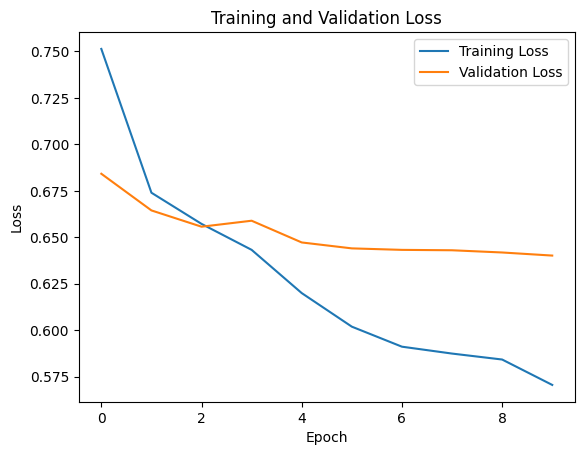

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history6.history['loss']
validation_loss = history6.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

19/19 [==============================] - 15s 767ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.65      0.62      0.63       287
Not Effusion       0.67      0.70      0.68       313

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.66      0.66      0.66       600



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

# Define the CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for reducing learning rate, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history5 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
75/75 [==============================] - 302s 4s/step - loss: 0.7605 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4767 - lr: 2.5000e-04
Epoch 2/10
75/75 [==============================] - 288s 4s/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4783 - lr: 2.5000e-04
Epoch 3/10
75/75 [==============================] - 294s 4s/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4783 - lr: 5.0000e-05
Epoch 4/10
19/19 [==============================] - 21s 1s/step - loss: 0.6932 - accuracy: 0.4767
Validation loss: 0.6932
Validation accuracy: 0.4767


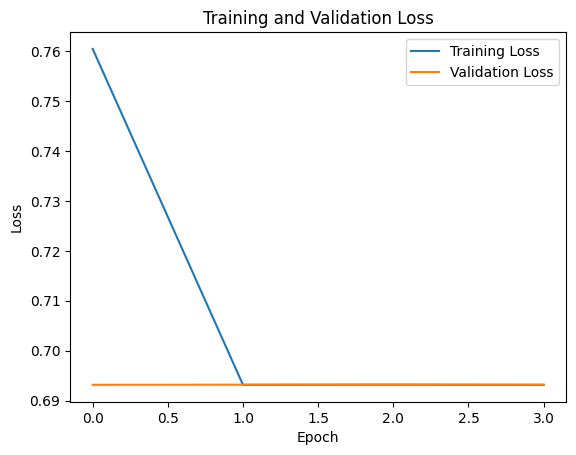

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history5.history['loss']
validation_loss = history5.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

# Define the CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for reducing learning rate, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history5 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
75/75 [==============================] - 306s 4s/step - loss: 0.8696 - accuracy: 0.4837 - val_loss: 0.6891 - val_accuracy: 0.5217 - lr: 2.5000e-04
Epoch 2/10
75/75 [==============================] - 300s 4s/step - loss: 0.6882 - accuracy: 0.5337 - val_loss: 0.6843 - val_accuracy: 0.5850 - lr: 2.5000e-04
Epoch 3/10
75/75 [==============================] - 308s 4s/step - loss: 0.6863 - accuracy: 0.5346 - val_loss: 0.6800 - val_accuracy: 0.5233 - lr: 2.5000e-04
Epoch 4/10
75/75 [==============================] - 301s 4s/step - loss: 0.6776 - accuracy: 0.5700 - val_loss: 0.6711 - val_accuracy: 0.6233 - lr: 2.5000e-04
Epoch 5/10
75/75 [==============================] - 298s 4s/step - loss: 0.6799 - accuracy: 0.5571 - val_loss: 0.6787 - val_accuracy: 0.6117 - lr: 2.5000e-04
Epoch 6/10
75/75 [==============================] - 320s 4s/step - loss: 0.6709 - accuracy: 0.5796 - val_loss: 0.6736 - val_accuracy: 0.6250 - lr: 5.0000e-05
Epoch 7/10
75/75 [==============================] - 